# Post-processing of results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
XLIM = (1000, 3500)
YLIM = (-0.02, 1.02)


def load_data(fname, rename=None):
    """ Load OpenCalphad results in a standard fashion. """
    df = pd.read_csv(fname, sep=",", header=0)
    df = df.fillna(0.0).sort_values("T")
    df = df.groupby("T").mean().reset_index()

    if rename is not None:
        df.rename(columns=rename, inplace=True)
        
    return df


def plot_data(df, title, loc=1, xlim=XLIM, ylim=YLIM):
    """ Plot OpenCalphad results in a standard fashion. """
    T = df["T"].to_numpy()
    phases = df.columns[1:]

    plt.close("all")
    plt.style.use("seaborn-white")
    fig, ax = plt.subplots(figsize=(6, 5))

    for phase in phases:
        Y = df[phase].to_numpy()
        ax.plot(T, Y, label=phase)

    ax.grid(linestyle=":")

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    ax.set_title(title)
    ax.set_xlabel("Temperature [K]")
    ax.set_ylabel("Phase molar fraction")

    box = ax.get_position()
    # ax.set_position([box.x0, box.y0 + box.height * 0.1,
    #                 box.width, box.height * 0.9])

    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc='upper center',
                    bbox_to_anchor=(0.5, -0.09), fancybox=True,
                    shadow=True, ncol=len(phases))

    fig.tight_layout()
    return fig, (lgd,)

## Macro 01

In [3]:
df = load_data("results-macro-01.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A6),NP(CORUNDUM)
0,1000.00,0.000016,0.00032,0.999664
1,1000.01,0.000016,0.00032,0.999664
2,1000.81,0.000016,0.00032,0.999664
3,1001.61,0.000016,0.00032,0.999664
4,1002.41,0.000016,0.00032,0.999664


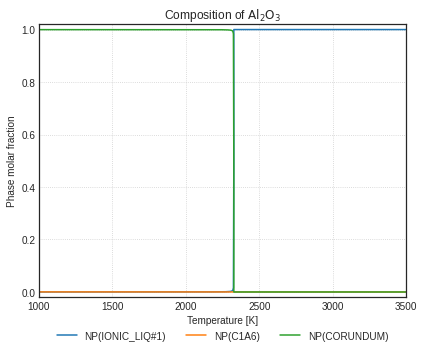

In [4]:
fig, artists = plot_data(df, "Composition of $\\mathrm{Al_2O_3}$")
fig.savefig("results-macro-01.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 02

In [5]:
rename = {"NP(IONIC_..TO#2)": "NP(IONIC_LIQ#2)"}
df = load_data("results-macro-02.csv", rename=rename)

# There should be no liquid miscibility gap here!
df["NP(IONIC_LIQ#1)"] = df["NP(IONIC_LIQ#1)"] + df["NP(IONIC_LIQ#2)"]
df.drop(columns=["NP(IONIC_LIQ#2)"], inplace=True)

df.head()

,T,NP(IONIC_LIQ#1),NP(HALITE)
0,1000.0,0.00002,0.99998
1,1000.4,0.00002,0.99998
2,1000.8,0.00002,0.99998
3,1001.2,0.00002,0.99998
4,1002.0,0.00002,0.99998


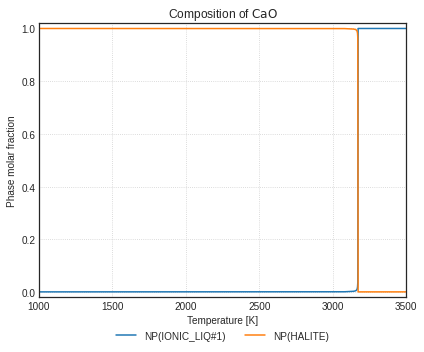

In [6]:
fig, artists = plot_data(df, "Composition of $\\mathrm{CaO}$")
fig.savefig("results-macro-02.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 03

In [7]:
df = load_data("results-macro-03.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C3A1),NP(HALITE)
0,1000.0,0.000007,0.999973,0.000020
1,1100.0,0.000007,0.999973,0.000020
2,1200.0,0.000007,0.999972,0.000020
3,1300.0,0.000007,0.999972,0.000021
4,1400.0,0.000007,0.999972,0.000021


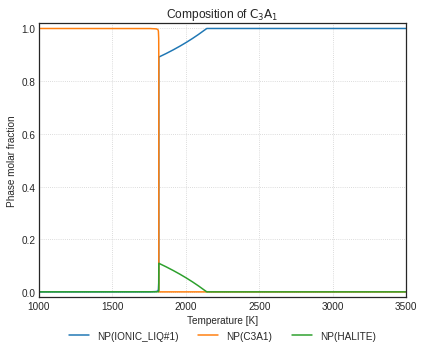

In [8]:
fig, artists = plot_data(df, "Composition of $\\mathrm{C_3A_1}$")
fig.savefig("results-macro-03.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 04

In [9]:
df = load_data("results-macro-04.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A1),NP(C3A1)
0,1000.0,0.000052,0.999561,0.000387
1,1000.4,0.000052,0.999561,0.000387
2,1000.8,0.000052,0.999561,0.000387
3,1001.2,0.000052,0.999561,0.000387
4,1002.0,0.000052,0.999561,0.000387


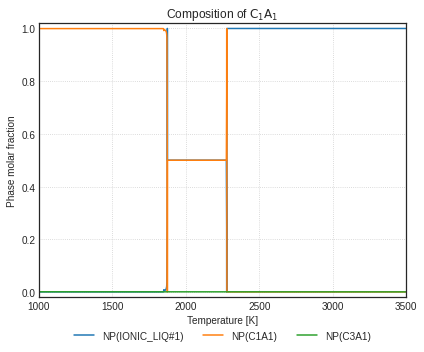

In [10]:
fig, artists = plot_data(df, "Composition of $\\mathrm{C_1A_1}$")
fig.savefig("results-macro-04.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 05

In [11]:
df = load_data("results-macro-05.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A1),NP(C1A2)
0,1000.0,0.000023,0.000144,0.999834
1,1000.4,0.000023,0.000144,0.999834
2,1000.8,0.000023,0.000144,0.999834
3,1001.2,0.000023,0.000144,0.999834
4,1002.0,0.000023,0.000144,0.999834


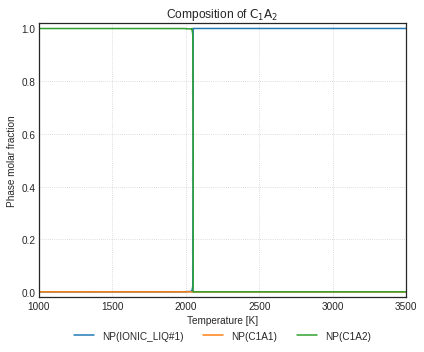

In [12]:
fig, artists = plot_data(df, "Composition of $\\mathrm{C_1A_2}$")
fig.savefig("results-macro-05.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 06

In [13]:
df = load_data("results-macro-06.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A6),NP(CORUNDUM)
0,1000.0,0.0,1.0,0.0
1,1004.0,0.0,1.0,0.0
2,1008.0,0.0,1.0,0.0
3,1012.0,0.0,1.0,0.0
4,1016.0,0.0,1.0,0.0


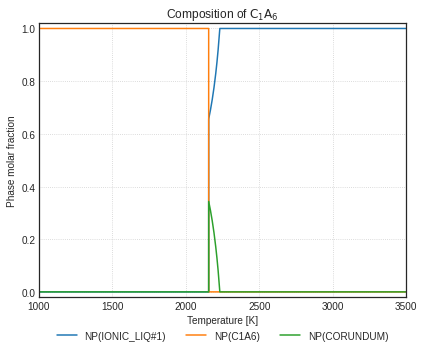

In [14]:
fig, artists = plot_data(df, "Composition of $\\mathrm{C_1A_6}$")
fig.savefig("results-macro-06.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 07

In [15]:
df = load_data("results-macro-07.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C3A1),NP(HALITE)
0,1000.00,0.000014,0.942846,0.05714
1,1000.01,0.000014,0.942846,0.05714
2,1000.81,0.000014,0.942846,0.05714
3,1001.61,0.000014,0.942846,0.05714
4,1002.41,0.000014,0.942846,0.05714


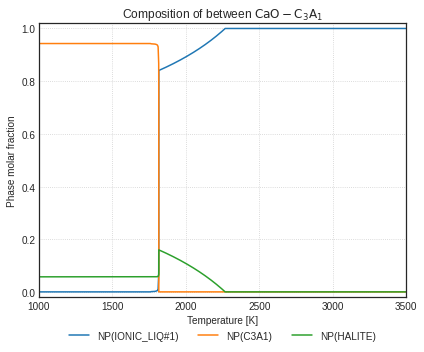

In [16]:
fig, artists = plot_data(df, "Composition of between $\\mathrm{CaO - C_3A_1}$")
fig.savefig("results-macro-07.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 08

In [17]:
df = load_data("results-macro-08.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A1),NP(C3A1)
0,1000.00,0.000009,0.915337,0.084654
1,1000.01,0.000009,0.915337,0.084654
2,1001.01,0.000009,0.915337,0.084654
3,1002.01,0.000009,0.915337,0.084654
4,1003.01,0.000009,0.915337,0.084654


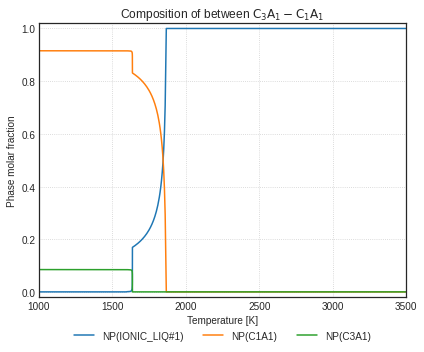

In [18]:
fig, artists = plot_data(df, "Composition of between $\\mathrm{C_3A_1 - C_1A_1}$")
fig.savefig("results-macro-08.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 09

In [19]:
df = load_data("results-macro-09.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A1),NP(C1A2)
0,1000.0,0.000038,0.226293,0.773670
1,1002.0,0.000038,0.226293,0.773670
2,1004.0,0.000038,0.226293,0.773669
3,1006.0,0.000038,0.226293,0.773669
4,1008.0,0.000038,0.226293,0.773669


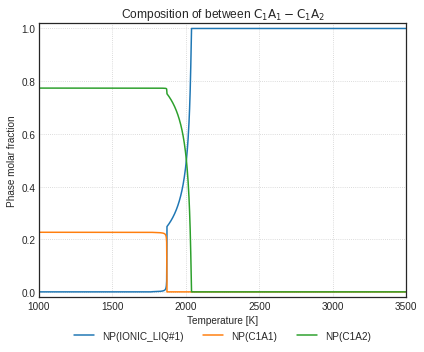

In [20]:
fig, artists = plot_data(df, "Composition of between $\\mathrm{C_1A_1 - C_1A_2}$")
fig.savefig("results-macro-09.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 10

In [21]:
df = load_data("results-macro-10.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A6),NP(CORUNDUM)
0,1000.0,0.000018,0.9056,0.094382
1,1000.4,0.000018,0.9056,0.094382
2,1000.8,0.000018,0.9056,0.094382
3,1001.2,0.000018,0.9056,0.094382
4,1002.0,0.000018,0.9056,0.094382


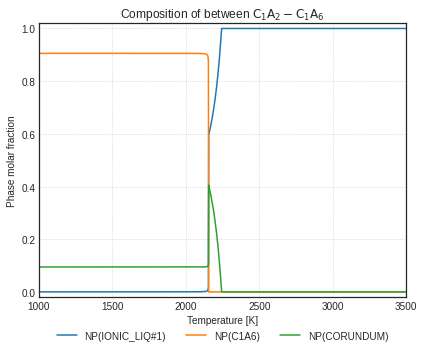

In [22]:
fig, artists = plot_data(df, "Composition of between $\\mathrm{C_1A_2 - C_1A_6}$")
fig.savefig("results-macro-10.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')

## Macro 11

In [23]:
df = load_data("results-macro-11.csv")
df.head()

,T,NP(IONIC_LIQ#1),NP(C1A6),NP(CORUNDUM)
0,1000.0,0.000008,0.61536,0.384632
1,1000.4,0.000008,0.61536,0.384632
2,1000.8,0.000008,0.61536,0.384632
3,1001.2,0.000008,0.61536,0.384632
4,1002.0,0.000008,0.61536,0.384632


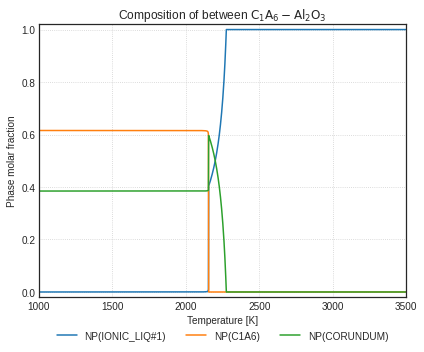

In [24]:
fig, artists = plot_data(df, "Composition of between $\\mathrm{C_1A_6 - Al_2O_3}$")
fig.savefig("results-macro-10.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches='tight')